<a href="https://colab.research.google.com/github/pin94/ab-testing/blob/main/Test_A_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
myDirFiles='/content/drive/MyDrive/ab_test.csv'
df=pd.read_csv(myDirFiles,delimiter=',')
df.head()

,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [ ]:
df.columns=['user_id','timestamp','group','landing_page','converted']
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [ ]:
print(f'Number of unique user:{df.user_id.nunique()}')

Number of unique user:290584


In [ ]:
n_treat=df[df['group']=='treatment'].shape[0]
n_new_page=df[df['landing_page']=='new_page'].shape[0]
difference=n_treat-n_new_page

pd.DataFrame({
    'N treatment':[n_treat],
    'N new_page':[n_new_page],
    'Difference':[difference]
})

,N treatment,N new_page,Difference
0,147276,147239,37


In [ ]:
# Melihat data yang treatment yang masuk kategori new page
df[(df['group']=='treatment') & (df['landing_page']=='new_page')]

,user_id,timestamp,group,landing_page,converted
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
6,679687,26:46.9,treatment,new_page,1
8,817355,58:09.0,treatment,new_page,1
9,839785,11:06.6,treatment,new_page,1
...,...,...,...,...,...
294462,677163,41:51.9,treatment,new_page,0
294465,925675,38:26.3,treatment,new_page,0
294468,643562,20:05.5,treatment,new_page,0
294472,822004,36:46.1,treatment,new_page,0


In [ ]:
#Melihat data yang control namun masuk kategori new page
df[(df['group']=='control') & (df['landing_page']=='new_page')]

,user_id,timestamp,group,landing_page,converted
22,767017,58:15.0,control,new_page,0
240,733976,11:16.4,control,new_page,0
490,808613,44:01.3,control,new_page,0
846,637639,09:52.7,control,new_page,1
850,793580,25:33.7,control,new_page,1
...,...,...,...,...,...
293894,741581,49:03.4,control,new_page,0
293996,942612,52:28.2,control,new_page,0
294200,928506,32:10.5,control,new_page,0
294253,886135,49:20.5,control,new_page,0


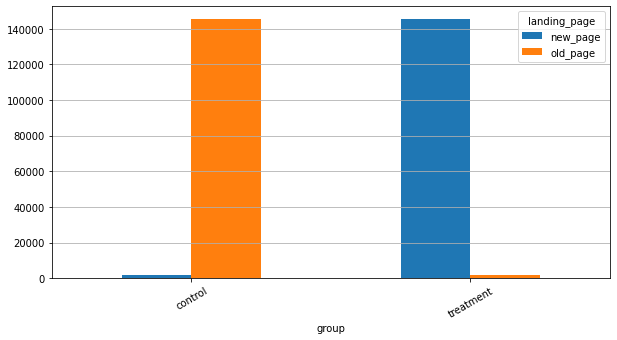

In [ ]:
CrosstabResult=pd.crosstab(index=df.group,columns=df.landing_page)
CrosstabResult

#Grouped bar chart
CrosstabResult.plot.bar(figsize=(10,5),rot=30)
plt.grid(axis='y')

In [ ]:
n_mismatch=len(df[(df.group=='treatment') & 
                  (df.landing_page=='old_page')]) + len(df[(df.group=='control') & 
                         (df.landing_page == 'new_page')])
percent_mismatch=round(n_mismatch/len(df)*100,2)
print(f'Number of mismatch rows: {n_mismatch} rows')
print(f'Precent of mismatch rows: {percent_mismatch} rows')

Number of mismatch rows: 3893 rows
Precent of mismatch rows: 1.32 rows


In [ ]:
df2=df[(df.group=='treatment') & (df.landing_page=='new_page')
     |(df.group=='control') & (df.landing_page=='old_page')]

In [ ]:
len(df2)

290585

In [ ]:
print(f'Current mismatch data:' + str(df2[((df2.group=='treatment')==(df2.landing_page=='new_page')) == False].shape[0]))

Current mismatch data:0


In [ ]:
df2[df2.duplicated(subset=['user_id'])==True]

,user_id,timestamp,group,landing_page,converted
2893,773192,55:59.6,treatment,new_page,0


In [ ]:
df2[df2.user_id==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,37:58.8,treatment,new_page,0
2893,773192,55:59.6,treatment,new_page,0


In [ ]:
df2=df2.drop_duplicates('user_id')

In [ ]:
# Cek apakah ada duplikasi user_id
df2[df2.duplicated(subset=['user_id'])==True]

,user_id,timestamp,group,landing_page,converted


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [ ]:
print(f'Number of unique users:{df2.user_id.nunique()}')

Number of unique users:290584


In [ ]:
df2.user_id.nunique()==len(df2)

True

# Melihat hasil eksperimen/ test
Maka dari itu, kita mempunyai 

In [ ]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [ ]:
pd.DataFrame(df2.group.value_counts())

,group
treatment,145310
control,145274


In [ ]:
import scipy.stats as stats
import statsmodels.stats.api as sms

In [ ]:
conversion_rates=df2.groupby('group')['converted']

std_p=lambda x: np.std(x,ddof=0) #std.
se_p=lambda x: stats.sem(x, ddof=0) #std. error

conversion_rates=conversion_rates.agg([np.mean,std_p,se_p])
conversion_rates.columns=['conversion rate','std_deviation',
                          'std_error']
conversion_rates.style.format('{:.5f}')

,conversion rate,std_deviation,std_error
group,,,
control,0.12039,0.32541,0.00085
treatment,0.11881,0.32356,0.00085


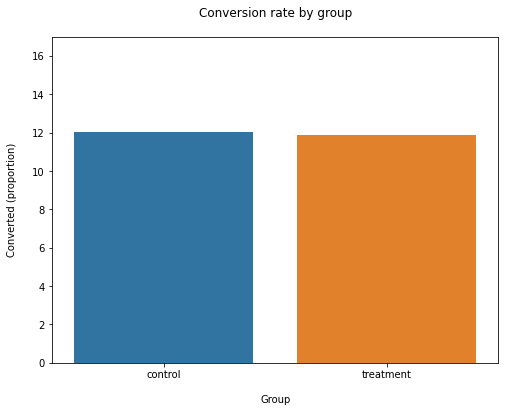

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(x=df2.group,
            y=df2.converted*100,
            ci=False)
plt.ylim(0,17)
plt.title('Conversion rate by group',pad=20)
plt.xlabel('Group',labelpad=15)
plt.ylabel('Converted (proportion)',labelpad=15);

# Hyphotesis Testing

In [ ]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

control_results=df2[df2.group=='control']['converted']
treatment_results=df2[df2.group='treatment']['converted']
n_con=control_results.count()
n_treat=treatment_results.count()
successes=[control_results.sum(), treatment_results.sum()]
nobs=[n_con,n_treat]

z_stat,pval=proportions_ztest(successes,nobs=nobs)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')

z statistic: 1.31
p-value: 0.190




*   List item
*   List item



In [ ]:
conversion_rates=df2.groupby('group')['converted']

std_p=lambda x: np.std(x, ddof=0)
se_p=lambda x: stats.sem(x, ddof=0)

conversion_rates=conversion_rates.agg([np.mean,std_p,se_p])
conversion_rates.columns=['convertion rates','std_deviation','std_error']

conversion_rates.style.format('{:.5f}')

,convertion rates,std_deviation,std_error
group,,,
control,0.12039,0.32541,0.00085
treatment,0.11881,0.32356,0.00085
